In [4]:
import torch
import numpy as np

import torchvision
from torch.utils.data import DataLoader
from torch.backends import mps
import matplotlib.pyplot as plt

def imshow(img, title=None):
  ''' function to show image '''
  plt.imshow(img.permute(1, 2, 0))
  if title is not None:
    plt.title(title)
  plt.show()

In [5]:
# setup some path variables
project_path = './'
data_path = project_path + 'data/Pneumonia/X-Ray/'

In [6]:
# select device to run the computations on
if mps.is_available(): # MAcOS with Metal support
    device = torch.device('mps')
elif torch.cuda.is_available(): # Nvidia GPU
    device = torch.device('cuda')
else: # CPU
    device = torch.device('cpu')


In [7]:
print(torch.cuda.is_available())

True


In [8]:

# Define the transformations
image_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),  # Resize the image to 224x224
    torchvision.transforms.ToTensor() # Convert the image to a pytorch tensor
])

# Define train / test dataset
train_dataset = torchvision.datasets.ImageFolder(data_path + 'train/', transform=image_transform)
test_dataset = torchvision.datasets.ImageFolder(data_path + 'test/', transform=image_transform)

class_labels = train_dataset.classes
print(40*"#")
print(class_labels)
print('Number of images in train set:', len(train_dataset))
print('Number of images in test set:', len(test_dataset))
print(40*"#")

########################################
['Bacterial', 'Viral']
Number of images in train set: 12935
Number of images in test set: 3232
########################################


Image Shape: torch.Size([3, 224, 224])
Label: Bacterial


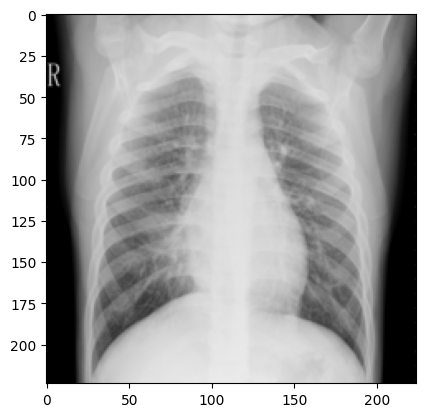

In [9]:
sample_idx = 112
sample_image, sample_label = train_dataset[sample_idx]
print(f'Image Shape: {sample_image.shape}')
print(f'Label: {class_labels[sample_label]}')

imshow(sample_image)
# sample_image[0,:,:]

# Define the data loader
batch_size = 8

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [10]:
# get a batch of images and labels
images, labels = next(iter(train_loader))
images = images[:,0:2]

print(f'Shape of image tensors: {images.shape}')
print(f'Shape of label tensors: {labels.shape}')
# images[:][0]
labels
# print(images[0][2],images[0][1])
# x=125
# if (torch.equal(images[0][0],images[0][1])):
#     print("Eq")
# else:
#     print("nah")

Shape of image tensors: torch.Size([8, 2, 224, 224])
Shape of label tensors: torch.Size([8])


tensor([0, 0, 1, 1, 0, 0, 0, 1])

In [48]:
# Display the batch of images
class_labels_string = ', '.join([class_labels[label] for label in labels]) # Create a string of class labels indexed by labels
# imshow(torchvision.utils.make_grid(images), title = class_labels_string)
# plt.title(class_labels_string)

print(class_labels_string)
print([class_labels[label] for label in labels])

Bacterial, Bacterial, Viral, Bacterial, Bacterial, Bacterial, Bacterial, Bacterial
['Bacterial', 'Bacterial', 'Viral', 'Bacterial', 'Bacterial', 'Bacterial', 'Bacterial', 'Bacterial']


In [7]:
from net_covid19 import Covid19Net
model = Covid19Net()

if torch.cuda.is_available():
    device_ids = [0]  # Specify the GPU IDs you want to use
    if torch.cuda.device_count() > 1:
        device_ids = list(range(torch.cuda.device_count()))
        print(f"Using {len(device_ids)} GPUs")
    else:
        print("1 cuda")
else:
    device = torch.device('cpu')
    print("Using CPU")

1 cuda
